In [203]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [204]:
df=pd.read_excel('최종데이터.xlsx', index_col='영화명')
df

,개봉일,매출액,매출액점유율,관객수,스크린수,상영횟수,대표국적,등급,장르,제작연도,유형,편당관객수,스크린당관객수,네티즌평점,평론가평점,긍정확률
영화명,,,,,,,,,,,,,,,,
보헤미안 랩소디,2018-10-31,25.105423,0.044,9224582,1179,204537,미국,12세이상관람가,드라마,2018,장편,45.099821,7824.072943,9.42,6.14,0.73
공작,2018-08-08,24.479543,0.024,4974520,1317,99001,한국,12세이상관람가,드라마,2017,장편,50.247169,3777.160213,6.83,6.93,0.20
국가부도의 날,2018-11-28,24.152268,0.017,3747952,1180,100804,한국,12세이상관람가,드라마,2018,장편,37.180588,3176.230508,8.12,6.50,0.79
코코,2018-01-11,24.044174,0.015,3510017,1177,85925,미국,전체관람가,애니메이션,2017,장편,40.849776,2982.172472,9.32,8.00,0.64
아쿠아맨,2018-12-19,24.139493,0.017,3491857,1285,54505,미국,12세이상관람가,액션,2018,장편,64.064893,2717.398444,8.36,6.83,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
라이브 하드,2021-02-25,14.480809,0.000,237,10,92,한국,15세이상관람가,드라마,2020,장편,2.576087,23.700000,8.86,6.00,0.64
윙스 오버 에베레스트,2021-09-30,13.874534,0.000,174,10,10,중국,15세이상관람가,액션,2019,장편,17.400000,17.400000,6.17,0.00,0.46
"킬링,",2021-04-07,13.908463,0.000,125,4,53,일본,청소년관람불가,드라마,2018,장편,2.358491,31.250000,8.78,7.83,0.13


In [205]:
from datetime import date
df['개봉일'] = df['개봉일'].apply(lambda x: x.strftime('%Y%m%d'))
df['개봉일'] = df['개봉일'].astype(int)

In [206]:
df["등급 "] = df["등급 "].map({'전체관람가':0, '12세이상관람가':1, '15세이상관람가':2, '청소년관람불가':3})

In [207]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['대표국적 ']=le.fit_transform(df['대표국적 '].values)
df['유형']=le.fit_transform(df['유형'].values)
df['등급 ']=le.fit_transform(df['등급 '].values)
df=df.dropna(axis=0)
df['장르']=le.fit_transform(df['장르'].values)

In [208]:
df.isnull().sum()

개봉일        0
매출액        0
매출액점유율     0
관객수        0
스크린수       0
상영횟수       0
대표국적       0
등급         0
장르         0
제작연도       0
유형         0
편당관객수      0
스크린당관객수    0
네티즌평점      0
평론가평점      0
긍정확률       0
dtype: int64

In [209]:
df.loc[df['네티즌평점']>=8.0,'result']=1
df.loc[df['네티즌평점']<8.0,'result']=0
df

,개봉일,매출액,매출액점유율,관객수,스크린수,상영횟수,대표국적,등급,장르,제작연도,유형,편당관객수,스크린당관객수,네티즌평점,평론가평점,긍정확률,result
영화명,,,,,,,,,,,,,,,,,
보헤미안 랩소디,20181031,25.105423,0.044,9224582,1179,204537,8,1,6,2018,1,45.099821,7824.072943,9.42,6.14,0.73,1.0
공작,20180808,24.479543,0.024,4974520,1317,99001,32,1,6,2017,1,50.247169,3777.160213,6.83,6.93,0.20,0.0
국가부도의 날,20181128,24.152268,0.017,3747952,1180,100804,32,1,6,2018,1,37.180588,3176.230508,8.12,6.50,0.79,1.0
코코,20180111,24.044174,0.015,3510017,1177,85925,8,0,13,2017,1,40.849776,2982.172472,9.32,8.00,0.64,1.0
아쿠아맨,20181219,24.139493,0.017,3491857,1285,54505,8,1,14,2018,1,64.064893,2717.398444,8.36,6.83,0.69,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
라이브 하드,20210225,14.480809,0.000,237,10,92,32,2,6,2020,1,2.576087,23.700000,8.86,6.00,0.64,1.0
윙스 오버 에베레스트,20210930,13.874534,0.000,174,10,10,24,2,14,2019,1,17.400000,17.400000,6.17,0.00,0.46,0.0
"킬링,",20210407,13.908463,0.000,125,4,53,23,3,6,2018,1,2.358491,31.250000,8.78,7.83,0.13,1.0


# 감성분석 포함시 DT, RF 모델 평가

In [210]:
# X = np.array(df.drop(['네티즌평점','result','긍정확률'], axis=1))
X = df.drop(['네티즌평점','result'], axis=1)
y = np.array(df['result'])

In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (568, 15)
y_train 크기: (568,)
X_test 크기: (244, 15)
y_test 크기: (244,)


In [212]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [213]:
temp_y_pred = tree.predict(X_test)

print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 1.]
실제값
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1.

In [214]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(y_test, temp_y_pred)


print('정확도: ', format(temp_acc))

정확도:  0.7540983606557377


In [215]:
train_scores, test_scores = list(), list()

for i in range(1,20):
    DT1 = DecisionTreeClassifier(max_depth=i)
    DT1.fit(X_train, y_train)
    
    train_att = DT1.predict(X_train)
    train_acc = accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    test_att = DT1.predict(X_test)
    test_acc = accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.771, test: 0.738
>2, train: 0.771, test: 0.738
>3, train: 0.790, test: 0.738
>4, train: 0.798, test: 0.738
>5, train: 0.820, test: 0.758
>6, train: 0.840, test: 0.754
>7, train: 0.864, test: 0.734
>8, train: 0.879, test: 0.758
>9, train: 0.914, test: 0.721
>10, train: 0.940, test: 0.705
>11, train: 0.963, test: 0.734
>12, train: 0.984, test: 0.721
>13, train: 0.991, test: 0.730
>14, train: 0.998, test: 0.734
>15, train: 1.000, test: 0.721
>16, train: 1.000, test: 0.725
>17, train: 1.000, test: 0.725
>18, train: 1.000, test: 0.717
>19, train: 1.000, test: 0.705


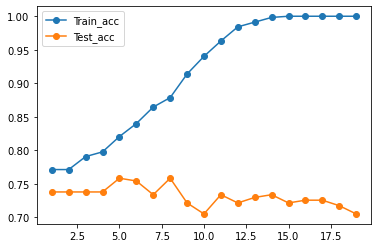

In [216]:
from matplotlib import pyplot

pyplot.plot(range(1,20), train_scores, '-o', label='Train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label='Test_acc')
pyplot.legend()
pyplot.show()

In [217]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('accuracy: ', accuracy_score(y_test, temp_y_pred))
print('precision: ', precision_score(y_test, temp_y_pred))
print('recall: ', recall_score(y_test, temp_y_pred))
print('f1: ', f1_score(y_test, temp_y_pred))

accuracy:  0.7540983606557377
precision:  0.7103448275862069
recall:  0.8512396694214877
f1:  0.774436090225564


In [218]:
print(classification_report(y_test, (tree.predict(X_test))))

              precision    recall  f1-score   support

         0.0       0.82      0.66      0.73       123
         1.0       0.71      0.85      0.77       121

    accuracy                           0.75       244
   macro avg       0.76      0.75      0.75       244
weighted avg       0.76      0.75      0.75       244



In [219]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

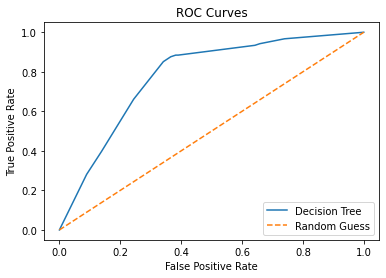

In [220]:
plt.plot(fpr, tpr, '-', ms=2, label="Decision Tree") 
plt.plot([0, 1], [0, 1], '--', label="Random Guess") 

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [221]:
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
print('Area Under Curve : %0.2f' % roc_auc)

Area Under Curve : 0.78


In [222]:
tree.feature_importances_

array([0.01287389, 0.        , 0.00735019, 0.        , 0.05198858,
       0.01777406, 0.        , 0.0450338 , 0.0691641 , 0.00735019,
       0.        , 0.02867952, 0.06644746, 0.03075292, 0.6625853 ])

In [223]:
pd.DataFrame(tree.feature_importances_.reshape((1,-1)), index=['feature_importance'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
feature_importance,0.012874,0.0,0.00735,0.0,0.051989,0.017774,0.0,0.045034,0.069164,0.00735,0.0,0.02868,0.066447,0.030753,0.662585


In [224]:
a=pd.DataFrame(tree.feature_importances_.reshape((1,-1)),columns=X.columns, index=['feature_importance'])
b=a.T
b=b.sort_values(by='feature_importance',ascending=False)
b

,feature_importance
긍정확률,0.662585
장르,0.069164
스크린당관객수,0.066447
스크린수,0.051989
등급,0.045034
평론가평점,0.030753
편당관객수,0.028680
상영횟수,0.017774
개봉일,0.012874
매출액점유율,0.007350


# 과정 
1. 감성분석 포함 랜덤포레스트 돌려보기
2. 결과 추출 후 중요도 0 제거후 모델 돌리기
3. 감성분석 제거 후 전체 데이터 이용해 랜덤포레스트 돌리기
4. 결과 추출 후 중요도 0 제거후 모델 돌리기

In [225]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=0)

In [226]:
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [227]:
temp_y_pred_rf = RF.predict(X_test)
temp_y_pred_rf

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1.

In [228]:
accuracy_score(y_test, temp_y_pred_rf)

0.7459016393442623

In [229]:
scores = []
for i in range(10,500,5):
    RF = RandomForestClassifier(n_estimators=i, random_state=0)
    RF.fit(X_train, y_train)
    
    att = RF.predict(X_test)
    acc = accuracy_score(y_test, att)
    scores.append(acc)
    
    print('>%d, acc: %.3f' % (i, acc))

>10, acc: 0.734
>15, acc: 0.730
>20, acc: 0.734
>25, acc: 0.762
>30, acc: 0.783
>35, acc: 0.762
>40, acc: 0.758
>45, acc: 0.775
>50, acc: 0.766
>55, acc: 0.762
>60, acc: 0.754
>65, acc: 0.762
>70, acc: 0.750
>75, acc: 0.742
>80, acc: 0.746
>85, acc: 0.742
>90, acc: 0.750
>95, acc: 0.746
>100, acc: 0.746
>105, acc: 0.738
>110, acc: 0.746
>115, acc: 0.742
>120, acc: 0.746
>125, acc: 0.742
>130, acc: 0.742
>135, acc: 0.742
>140, acc: 0.746
>145, acc: 0.746
>150, acc: 0.750
>155, acc: 0.750
>160, acc: 0.746
>165, acc: 0.742
>170, acc: 0.742
>175, acc: 0.742
>180, acc: 0.742
>185, acc: 0.742
>190, acc: 0.742
>195, acc: 0.742
>200, acc: 0.738
>205, acc: 0.738
>210, acc: 0.738
>215, acc: 0.742
>220, acc: 0.738
>225, acc: 0.738
>230, acc: 0.742
>235, acc: 0.746
>240, acc: 0.746
>245, acc: 0.742
>250, acc: 0.742
>255, acc: 0.746
>260, acc: 0.750
>265, acc: 0.750
>270, acc: 0.754
>275, acc: 0.754
>280, acc: 0.754
>285, acc: 0.754
>290, acc: 0.758
>295, acc: 0.758
>300, acc: 0.750
>305, acc: 0.75

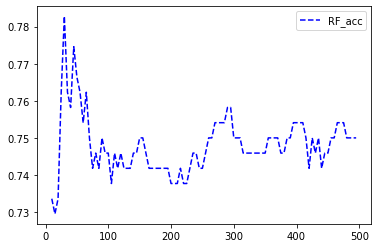

In [230]:
pyplot.plot(range(10,500,5), scores, 'b--', label='RF_acc')
pyplot.legend()

In [231]:
# 가장 높은 값이 나오는 50으로 n_estimators 조정 후 모델 돌려보기
RF = RandomForestClassifier(n_estimators=50, random_state=0)
RF.fit(X_train, y_train)
temp_y_pred_rf = RF.predict(X_test)

In [232]:
#랜덤포레스트 모델 성능
print('accuracy: ', accuracy_score(y_test, temp_y_pred_rf))
print('precision: ', precision_score(y_test, temp_y_pred_rf))
print('recall: ', recall_score(y_test, temp_y_pred_rf))
print('f1: ', f1_score(y_test, temp_y_pred_rf))

accuracy:  0.7663934426229508
precision:  0.7424242424242424
recall:  0.8099173553719008
f1:  0.774703557312253


In [233]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, RF.predict_proba(X_test)[:,1])

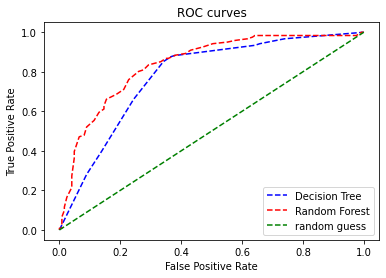

In [234]:
plt.plot(fpr1, tpr1, 'b--', label = 'Decision Tree')
plt.plot(fpr2, tpr2, 'r--', label = 'Random Forest')
plt.plot([0,1], [0,1], 'g--', label = 'random guess')

plt.title('ROC curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc = "lower right")

In [235]:
roc_auc_DT = metrics.auc(fpr1, tpr1)
roc_auc_RF = metrics.auc(fpr2, tpr2)

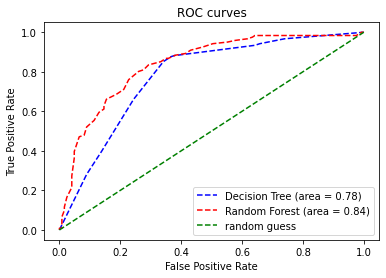

In [236]:
plt.plot(fpr1, tpr1, 'b--', label = 'Decision Tree (area = %0.2f)' % roc_auc_DT)
plt.plot(fpr2, tpr2, 'r--', label = 'Random Forest (area = %0.2f)' % roc_auc_RF)
plt.plot([0,1], [0,1], 'g--', label = 'random guess')

plt.title('ROC curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc = "lower right")

In [237]:
RF.feature_importances_

array([0.07069728, 0.07166924, 0.00686885, 0.06102688, 0.07492243,
       0.06308227, 0.03774828, 0.04627295, 0.04841899, 0.03328344,
       0.0016609 , 0.06803536, 0.08110428, 0.0568254 , 0.27838345])

In [238]:
pd.DataFrame(RF.feature_importances_.reshape((1,-1)), index=['feature_importance'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
feature_importance,0.070697,0.071669,0.006869,0.061027,0.074922,0.063082,0.037748,0.046273,0.048419,0.033283,0.001661,0.068035,0.081104,0.056825,0.278383


In [239]:
a=pd.DataFrame(RF.feature_importances_.reshape((1,-1)),columns=X.columns, index=['feature_importance'])
b=a.T
b=b.sort_values(by='feature_importance',ascending=False)
b

,feature_importance
긍정확률,0.278383
스크린당관객수,0.081104
스크린수,0.074922
매출액,0.071669
개봉일,0.070697
편당관객수,0.068035
상영횟수,0.063082
관객수,0.061027
평론가평점,0.056825
장르,0.048419


가장 낮은 5개 데이터 제거 후 다시 돌려보기

장르, 대표국적, 제작연도, 매출액점유율, 유형 제거

In [240]:
df.columns

Index(['개봉일', '매출액 ', '매출액점유율', '관객수 ', '스크린수 ', '상영횟수 ', '대표국적 ', '등급 ', '장르',
       '제작연도', '유형', '편당관객수', '스크린당관객수', '네티즌평점', '평론가평점', '긍정확률', 'result'],
      dtype='object')

In [241]:
df=df.drop(['장르','대표국적 ','제작연도','매출액점유율','유형'],axis=1)

In [242]:
df.columns

Index(['개봉일', '매출액 ', '관객수 ', '스크린수 ', '상영횟수 ', '등급 ', '편당관객수', '스크린당관객수',
       '네티즌평점', '평론가평점', '긍정확률', 'result'],
      dtype='object')

In [243]:
X = df.drop(['네티즌평점','result'], axis=1)
y = np.array(df['result'])

In [244]:
X.columns

Index(['개봉일', '매출액 ', '관객수 ', '스크린수 ', '상영횟수 ', '등급 ', '편당관객수', '스크린당관객수',
       '평론가평점', '긍정확률'],
      dtype='object')

In [245]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [246]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=50, random_state=0)

In [247]:
RF.fit(X_train, y_train)
temp_y_pred_rf = RF.predict(X_test)


In [248]:
#랜덤포레스트 모델 성능
print('accuracy: ', accuracy_score(y_test, temp_y_pred_rf))
print('precision: ', precision_score(y_test, temp_y_pred_rf))
print('recall: ', recall_score(y_test, temp_y_pred_rf))
print('f1: ', f1_score(y_test, temp_y_pred_rf))


accuracy:  0.7540983606557377
precision:  0.725925925925926
recall:  0.8099173553719008
f1:  0.765625


In [249]:
RF.feature_importances_

array([0.08410677, 0.08063048, 0.06453051, 0.08023113, 0.06907085,
       0.05028953, 0.07792623, 0.09640308, 0.06780295, 0.32900847])

In [250]:
pd.DataFrame(RF.feature_importances_.reshape((1,-1)), index=['feature_importance'])

,0,1,2,3,4,5,6,7,8,9
feature_importance,0.084107,0.08063,0.064531,0.080231,0.069071,0.05029,0.077926,0.096403,0.067803,0.329008


In [251]:
a=pd.DataFrame(RF.feature_importances_.reshape((1,-1)),columns=X.columns, index=['feature_importance'])
b=a.T
b=b.sort_values(by='feature_importance',ascending=False)
b

,feature_importance
긍정확률,0.329008
스크린당관객수,0.096403
개봉일,0.084107
매출액,0.080630
스크린수,0.080231
편당관객수,0.077926
상영횟수,0.069071
평론가평점,0.067803
관객수,0.064531
등급,0.050290


## 전체데이터에서 감성분석을 제거하고 난 후의 데이터를 측정해보자

In [266]:
df=pd.read_excel('최종데이터.xlsx',index_col='영화명')

from datetime import date
df['개봉일'] = df['개봉일'].apply(lambda x: x.strftime('%Y%m%d'))
df['개봉일'] = df['개봉일'].astype(int)


# object열을 바꿔주기
# 1) 등급
df['등급 '].value_counts()
df['등급 ']=df['등급 '].map({'전체관람가':0,'12세이상관람가':1,'12세관람가':1,'15세이상관람가':2,'청소년관람불가':3})

# 2) 대표국적, 유형, 장르 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
# 유형, 장르, 대표국적에 레이블 인코딩
le=LabelEncoder()
df['대표국적 ']=le.fit_transform(df['대표국적 '].values)

df['유형']=le.fit_transform(df['유형'].values)
df['장르']=le.fit_transform(df['장르'].values)

df.loc[df['네티즌평점']>=8.0,'result']=1
df.loc[df['네티즌평점']<8.0,'result']=0


In [267]:
df

,개봉일,매출액,매출액점유율,관객수,스크린수,상영횟수,대표국적,등급,장르,제작연도,유형,편당관객수,스크린당관객수,네티즌평점,평론가평점,긍정확률,result
영화명,,,,,,,,,,,,,,,,,
보헤미안 랩소디,20181031,25.105423,0.044,9224582,1179,204537,8,1,6,2018,1,45.099821,7824.072943,9.42,6.14,0.73,1.0
공작,20180808,24.479543,0.024,4974520,1317,99001,32,1,6,2017,1,50.247169,3777.160213,6.83,6.93,0.20,0.0
국가부도의 날,20181128,24.152268,0.017,3747952,1180,100804,32,1,6,2018,1,37.180588,3176.230508,8.12,6.50,0.79,1.0
코코,20180111,24.044174,0.015,3510017,1177,85925,8,0,13,2017,1,40.849776,2982.172472,9.32,8.00,0.64,1.0
아쿠아맨,20181219,24.139493,0.017,3491857,1285,54505,8,1,14,2018,1,64.064893,2717.398444,8.36,6.83,0.69,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
라이브 하드,20210225,14.480809,0.000,237,10,92,32,2,6,2020,1,2.576087,23.700000,8.86,6.00,0.64,1.0
윙스 오버 에베레스트,20210930,13.874534,0.000,174,10,10,24,2,14,2019,1,17.400000,17.400000,6.17,0.00,0.46,0.0
"킬링,",20210407,13.908463,0.000,125,4,53,23,3,6,2018,1,2.358491,31.250000,8.78,7.83,0.13,1.0


In [268]:
X=df.drop(['네티즌평점','result','긍정확률'],axis=1)
y=df['result']

In [269]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (568, 14)
y_train 크기: (568,)
X_test 크기: (244, 14)
y_test 크기: (244,)


In [270]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [271]:
temp_y_pred_rf = RF.predict(X_test)
temp_y_pred_rf


array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0.

In [272]:
accuracy_score(y_test, temp_y_pred_rf)

0.6967213114754098

>10, acc: 0.746
>15, acc: 0.750
>20, acc: 0.738
>25, acc: 0.762
>30, acc: 0.750
>35, acc: 0.766
>40, acc: 0.742
>45, acc: 0.750
>50, acc: 0.754
>55, acc: 0.762
>60, acc: 0.750
>65, acc: 0.758
>70, acc: 0.754
>75, acc: 0.750
>80, acc: 0.742
>85, acc: 0.742
>90, acc: 0.730
>95, acc: 0.730
>100, acc: 0.734
>105, acc: 0.742
>110, acc: 0.742
>115, acc: 0.734
>120, acc: 0.738
>125, acc: 0.738
>130, acc: 0.742
>135, acc: 0.738
>140, acc: 0.730
>145, acc: 0.738
>150, acc: 0.742
>155, acc: 0.738
>160, acc: 0.738
>165, acc: 0.738
>170, acc: 0.742
>175, acc: 0.746
>180, acc: 0.734
>185, acc: 0.730
>190, acc: 0.738
>195, acc: 0.734
>200, acc: 0.746
>205, acc: 0.746
>210, acc: 0.738
>215, acc: 0.734
>220, acc: 0.734
>225, acc: 0.734
>230, acc: 0.730
>235, acc: 0.734
>240, acc: 0.734
>245, acc: 0.738
>250, acc: 0.734
>255, acc: 0.734
>260, acc: 0.734
>265, acc: 0.734
>270, acc: 0.730
>275, acc: 0.738
>280, acc: 0.730
>285, acc: 0.734
>290, acc: 0.738
>295, acc: 0.742
>300, acc: 0.738
>305, acc: 0.74

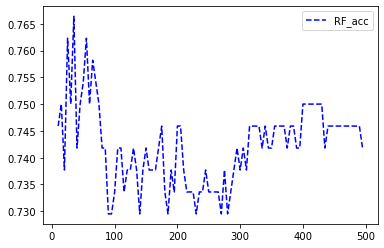

In [257]:
scores = []
for i in range(10,500,5):
    RF = RandomForestClassifier(n_estimators=i, random_state=0)
    RF.fit(X_train, y_train)
    
    att = RF.predict(X_test)
    acc = accuracy_score(y_test, att)
    scores.append(acc)
    
    print('>%d, acc: %.3f' % (i, acc))

pyplot.plot(range(10,500,5), scores, 'b--', label='RF_acc')
pyplot.legend()

In [273]:
# 가장 높은 값이 나오는 50으로 n_estimators 조정 후 모델 돌려보기
RF = RandomForestClassifier(n_estimators=50, random_state=0)
RF.fit(X_train, y_train)
temp_y_pred_rf = RF.predict(X_test)


In [274]:
#랜덤포레스트 모델 성능
print('accuracy: ', accuracy_score(y_test, temp_y_pred_rf))
print('precision: ', precision_score(y_test, temp_y_pred_rf))
print('recall: ', recall_score(y_test, temp_y_pred_rf))
print('f1: ', f1_score(y_test, temp_y_pred_rf))

accuracy:  0.6844262295081968
precision:  0.671875
recall:  0.7107438016528925
f1:  0.6907630522088354


In [275]:
RF.feature_importances_

array([0.09827369, 0.089258  , 0.01311791, 0.08828969, 0.09646075,
       0.08950744, 0.04736849, 0.06718569, 0.07323958, 0.04949796,
       0.00105164, 0.09382896, 0.10978369, 0.08313654])

In [276]:
pd.DataFrame(RF.feature_importances_.reshape((1,-1)), index=['feature_importance'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
feature_importance,0.098274,0.089258,0.013118,0.08829,0.096461,0.089507,0.047368,0.067186,0.07324,0.049498,0.001052,0.093829,0.109784,0.083137


In [277]:
a=pd.DataFrame(RF.feature_importances_.reshape((1,-1)),columns=X.columns, index=['feature_importance'])
b=a.T
b=b.sort_values(by='feature_importance',ascending=False)
b

,feature_importance
스크린당관객수,0.109784
개봉일,0.098274
스크린수,0.096461
편당관객수,0.093829
상영횟수,0.089507
매출액,0.089258
관객수,0.088290
평론가평점,0.083137
장르,0.073240
등급,0.067186


### 긍정확률을 제외하고 비교해보면, 거의 모든부분이 일정부분이상 영향을 미치는 것을 확인할 수 있다.

-> 그렇기에 영향을 미치지 않는 것이 없으므로 이 과정에서 종료한다.